In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\DELL\Desktop\ML projects\Fraud detection\ensemble\credit-card-default.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
defaulted    30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


### Data Preparation and Model Building


In [4]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [5]:
# Putting feature variable to X
X = df.drop('defaulted',axis=1)

# Putting response variable to y
y = df['defaulted']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)


#### Default Hyperparameters
Let's first fit a random forest model with default hyperparameters.

In [7]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [8]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [9]:
# Making predictions
predictions = rfc.predict(X_test)

In [10]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [11]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7058
           1       0.61      0.32      0.42      1942

    accuracy                           0.81      9000
   macro avg       0.72      0.63      0.65      9000
weighted avg       0.79      0.81      0.79      9000



In [12]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[6658  400]
 [1313  629]]


In [13]:
print(accuracy_score(y_test,predictions))

0.8096666666666666


### Hyperparameter Tuning

### Tuning max_depth

In [18]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [19]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.133944,0.012503,0.001599,0.003199,2,{'max_depth': 2},0.806951,0.801667,0.803333,0.800476,...,0.801524,0.003846,4,0.804453,0.799167,0.797976,0.805179,0.796084,0.800572,0.003609
1,0.389655,0.073373,0.014718,0.004773,7,{'max_depth': 7},0.815520,0.819286,0.817857,0.814048,...,0.817048,0.001959,1,0.831597,0.828631,0.831071,0.833750,0.829593,0.830929,0.001760
2,0.534953,0.067534,0.015297,0.000652,12,{'max_depth': 12},0.814806,0.814048,0.816190,0.810952,...,0.813048,0.002563,2,0.879338,0.878452,0.876845,0.882738,0.881019,0.879679,0.002040
3,0.701242,0.080020,0.015697,0.000147,17,{'max_depth': 17},0.808141,0.808810,0.811905,0.798333,...,0.805429,0.005311,3,0.928627,0.926131,0.928155,0.927381,0.923397,0.926738,0.001872


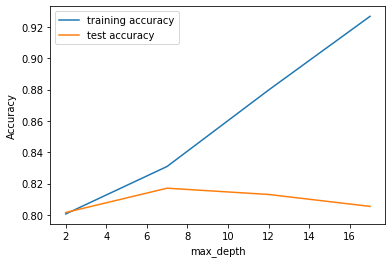

In [20]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Tuning n_estimators

In [22]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [23]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.206236,0.209774,0.060143,0.011886,100,{'n_estimators': 100},0.813616,0.813571,0.812143,0.806429,...,0.810429,0.003327,1,0.811001,0.810298,0.812619,0.812619,0.812214,0.811750,0.000938
1,10.592339,0.937106,0.328267,0.100155,500,{'n_estimators': 500},0.812188,0.814048,0.811190,0.805952,...,0.810143,0.003032,2,0.811239,0.810595,0.811310,0.812500,0.813463,0.811821,0.001026
2,18.351437,0.987343,0.485317,0.019300,900,{'n_estimators': 900},0.810759,0.814048,0.811429,0.805476,...,0.810000,0.002912,3,0.811358,0.810536,0.811786,0.812857,0.812809,0.811869,0.000884
3,24.779263,0.460734,0.713744,0.038543,1300,{'n_estimators': 1300},0.810997,0.813095,0.810952,0.805952,...,0.809571,0.002713,4,0.811239,0.810476,0.811667,0.812619,0.812273,0.811655,0.000758


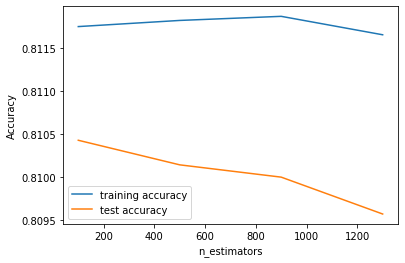

In [24]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [25]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [26]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.204660,0.011436,0.006328,0.005872,4,{'max_features': 4},0.806951,0.814524,0.822143,0.805714,...,0.811571,0.006089,5,0.808917,0.812083,0.819405,0.812857,0.812095,0.813071,0.003445
1,0.343423,0.005919,0.012575,0.003738,8,{'max_features': 8},0.816948,0.816429,0.816190,0.813810,...,0.816286,0.001394,4,0.820763,0.818393,0.819464,0.819524,0.820546,0.819738,0.000853
2,0.561073,0.010700,0.006250,0.007655,14,{'max_features': 14},0.816710,0.821667,0.820476,0.816905,...,0.818381,0.002243,3,0.821597,0.821190,0.821190,0.822024,0.822272,0.821655,0.000436
3,0.813228,0.062616,0.005398,0.004452,20,{'max_features': 20},0.817424,0.821190,0.820714,0.816905,...,0.818762,0.001809,1,0.823085,0.821250,0.821369,0.822560,0.820963,0.821845,0.000825
4,0.916167,0.008819,0.010505,0.008822,24,{'max_features': 24},0.817662,0.820952,0.820714,0.816429,...,0.818667,0.001823,2,0.822847,0.820952,0.821369,0.822381,0.822749,0.822060,0.000762


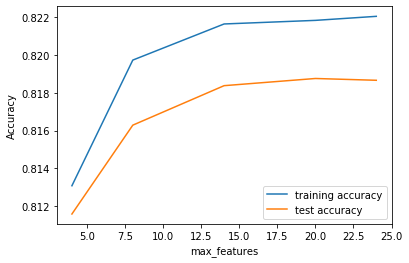

In [27]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Tuning min_samples_leaf


In [29]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [30]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.466149,0.082956,0.014320,0.002006,100,{'min_samples_leaf': 100},0.814806,0.819762,0.818571,0.810714,...,0.813762,0.005424,1,0.819037,0.816845,0.818810,0.818869,0.807809,0.816274,0.004308
1,0.491338,0.098064,0.014389,0.006782,150,{'min_samples_leaf': 150},0.810045,0.806429,0.809762,0.806190,...,0.809190,0.002701,2,0.809691,0.806607,0.809762,0.812679,0.818523,0.811452,0.004023
2,0.307848,0.010070,0.009523,0.005186,200,{'min_samples_leaf': 200},0.810997,0.805952,0.815952,0.799762,...,0.807429,0.005569,4,0.809870,0.806905,0.814286,0.805476,0.809833,0.809274,0.003027
3,0.299099,0.015849,0.008199,0.004165,250,{'min_samples_leaf': 250},0.807665,0.813095,0.808571,0.807381,...,0.809095,0.002067,3,0.806893,0.813631,0.808452,0.810179,0.812511,0.810333,0.002491
4,0.331387,0.033093,0.013119,0.001331,300,{'min_samples_leaf': 300},0.804570,0.808571,0.805238,0.799762,...,0.805476,0.003385,6,0.803322,0.806429,0.801607,0.806250,0.811083,0.805738,0.003231


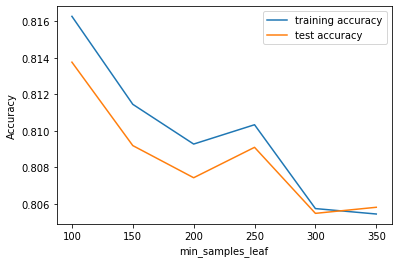

In [31]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_split


In [32]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [33]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.511045,0.017201,0.012203,0.003144,200,{'min_samples_split': 200},0.819091,0.821429,0.820238,0.814762,...,0.818333,0.002503,1,0.823085,0.824107,0.822857,0.825060,0.826141,0.824250,0.001229
1,0.475736,0.011383,0.010529,0.005428,250,{'min_samples_split': 250},0.816234,0.820714,0.819286,0.814524,...,0.816714,0.002928,3,0.821239,0.821190,0.821429,0.822143,0.822987,0.821798,0.000686
2,0.456849,0.014066,0.009431,0.008714,300,{'min_samples_split': 300},0.817424,0.820238,0.819048,0.815238,...,0.816571,0.003291,5,0.821061,0.822857,0.821369,0.822143,0.819118,0.821310,0.001262
3,0.430796,0.013571,0.011774,0.006053,350,{'min_samples_split': 350},0.814330,0.822381,0.816190,0.815714,...,0.817238,0.002773,2,0.818858,0.821012,0.818810,0.822083,0.819177,0.819988,0.001324
4,0.446566,0.019218,0.013246,0.001976,400,{'min_samples_split': 400},0.814568,0.815714,0.819048,0.814762,...,0.816190,0.001644,6,0.818501,0.816548,0.818571,0.819405,0.819773,0.818560,0.001117


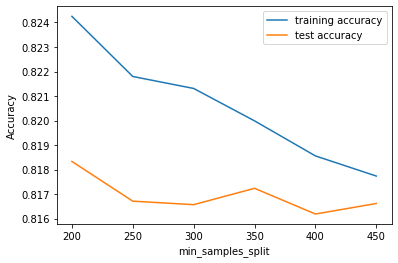

In [34]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Grid Search to Find Optimal Hyperparameters


In [35]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [36]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 11.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [38]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8184761904761905 using {'max_depth': 4, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


**Fitting the final model with the best parameters obtained from grid search.**

In [39]:

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [40]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
# predict
predictions = rfc.predict(X_test)

In [42]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7058
           1       0.70      0.35      0.47      1942

    accuracy                           0.83      9000
   macro avg       0.77      0.65      0.68      9000
weighted avg       0.81      0.83      0.80      9000



In [44]:
print(confusion_matrix(y_test,predictions))

[[6765  293]
 [1262  680]]


In [45]:
(6753+692)/(6753+692+305+1250)

0.8272222222222222